In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from datetime import date

In [2]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [3]:
combined_df =contacts_df.merge(listings_df, left_on ='id_listing_anon', right_on='id_listing_anon')
combined_df2 =combined_df.merge(users_df, left_on ='id_guest_anon', right_on='id_user_anon')
combined_df3 = combined_df2.copy()
combined_df3.ts_booking_at = combined_df3.ts_booking_at.fillna(0)
combined_df3.ts_booking_at = combined_df3.ts_booking_at.apply(lambda x: 0 if x==0 else 1)
combined_df3["m_guests"] = combined_df3["m_guests"].fillna(2)
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)

In [17]:
combined_df3['ts_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'],infer_datetime_format=True)
combined_df3['ds_checkin_first'] = pd.to_datetime(combined_df3['ds_checkin_first'],infer_datetime_format=True)

combined_df3['date_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'].dt.date)
combined_df3['delta_days'] = combined_df3.ds_checkin_first - combined_df3.date_interaction_first
combined_df3['delta_days'] = pd.to_numeric(combined_df3['delta_days'].dt.days, downcast='integer')
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)
d1 =  {
    '-unknown-':'new'}
combined_df3['guest_user_stage_first'].replace(d1, inplace= True)

In [5]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19


In [6]:
# combined_df3['date_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'].dt.date)
# combined_df3['delta_days'] = combined_df3.ds_checkin_first - combined_df3.date_interaction_first
# combined_df3['delta_days'] = pd.to_numeric(combined_df3['delta_days'].dt.days, downcast='integer')

In [7]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27979 non-null  object        
 1   id_host_anon                          27979 non-null  object        
 2   id_listing_anon                       27979 non-null  object        
 3   ts_interaction_first                  27979 non-null  datetime64[ns]
 4   ts_reply_at_first                     25935 non-null  object        
 5   ts_accepted_at_first                  16454 non-null  object        
 6   ts_booking_at                         27979 non-null  int64         
 7   ds_checkin_first                      27979 non-null  datetime64[ns]
 8   ds_checkout_first                     27979 non-null  object        
 9   m_guests                              27979 non-null  float64       
 10

In [8]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19


In [11]:
print(f'm_guest:{combined_df3["m_guests"].isnull().sum()}')
print(f'm_interactions:{combined_df3["m_interactions"].isnull().sum()}')
print(f'm_first_message_length_in_characters:{combined_df3["m_first_message_length_in_characters"].isnull().sum()}')
print(f'total_reviews:{combined_df3["total_reviews"].isnull().sum()}')
print(f'words_in_user_profile:{combined_df3["words_in_user_profile"].isnull().sum()}')

m_guest:0
m_interactions:0
m_first_message_length_in_characters:0
total_reviews:0
words_in_user_profile:0


In [9]:
combined_df3.shape

(27979, 23)

In [15]:
combined_df3.total_reviews.describe()

count    27979.000000
mean        15.639944
std         27.728108
min        -34.000000
25%          0.000000
50%          3.000000
75%         18.000000
max        268.000000
Name: total_reviews, dtype: float64

In [10]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19


In [13]:
kde_data = combined_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors')

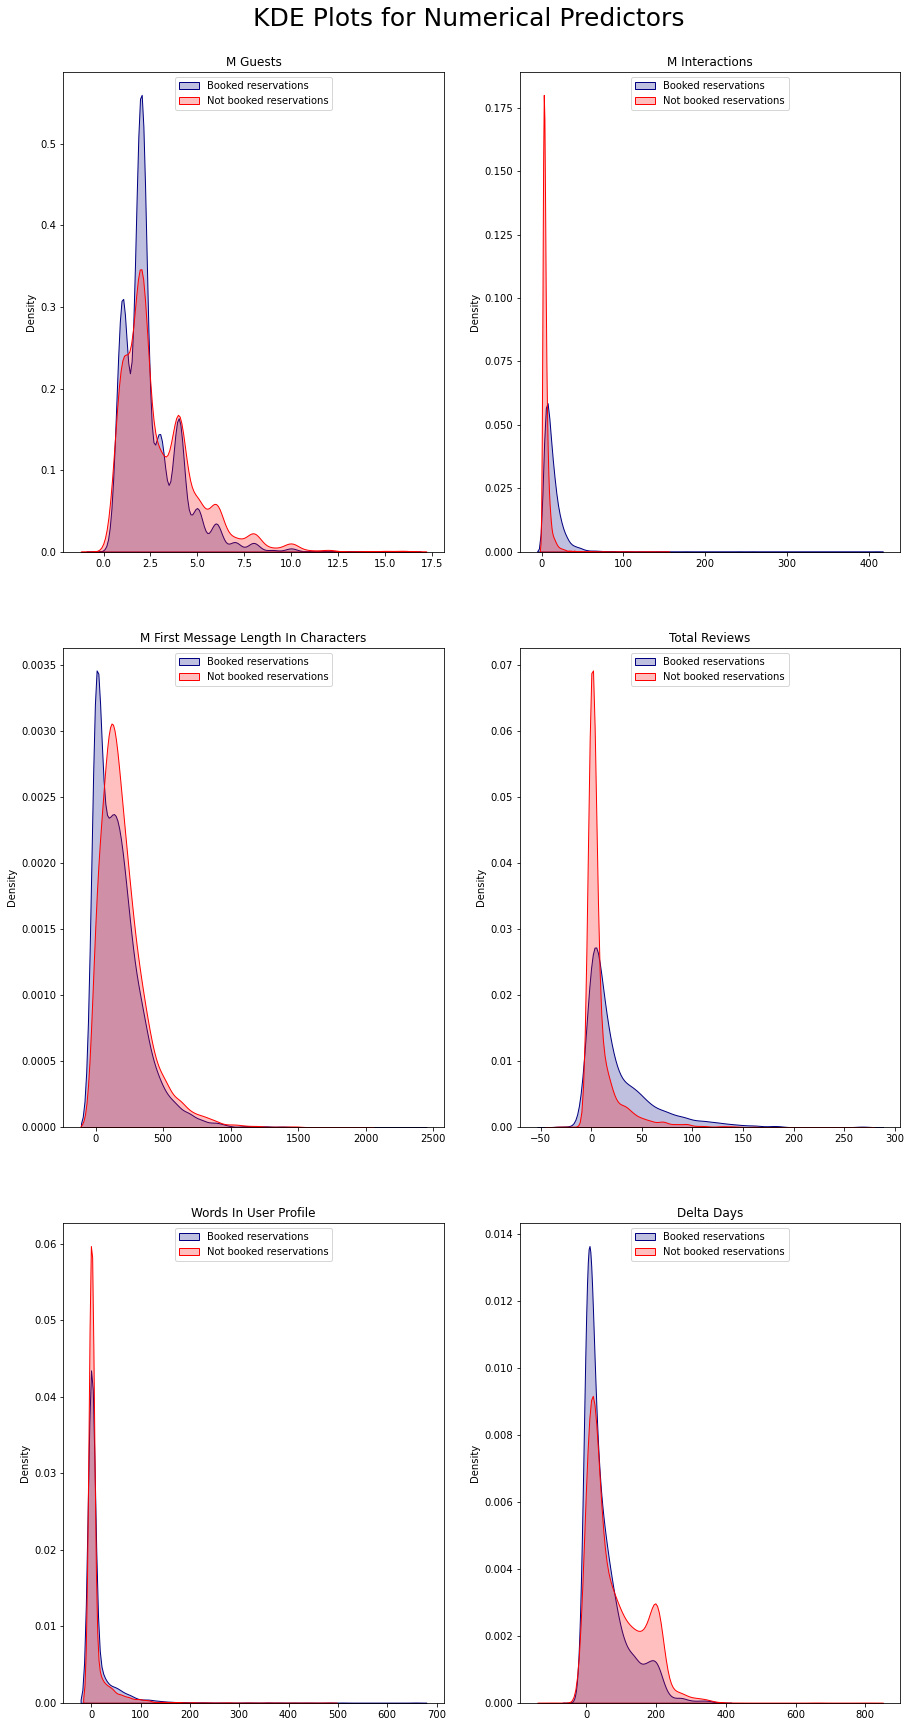

In [14]:
kde_cols = kde_data.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data[kde_data.ts_booking_at == 1]
    unbooked = kde_data[kde_data.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

In [18]:
cat_data = combined_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols = cat_data.iloc[:,:4].columns.to_list()
group_data = cat_data.groupby([col,'booked']).size().unstack()
group_data.columns = ['Unbooked', 'Booked']
group_data.plot.bar(stacked=True, color=['#619CFF', '#F8766D'])

KeyError: 'delta_days'

Text(0.5, 0.91, 'Stacked Barcharts for Categorical Predictors')

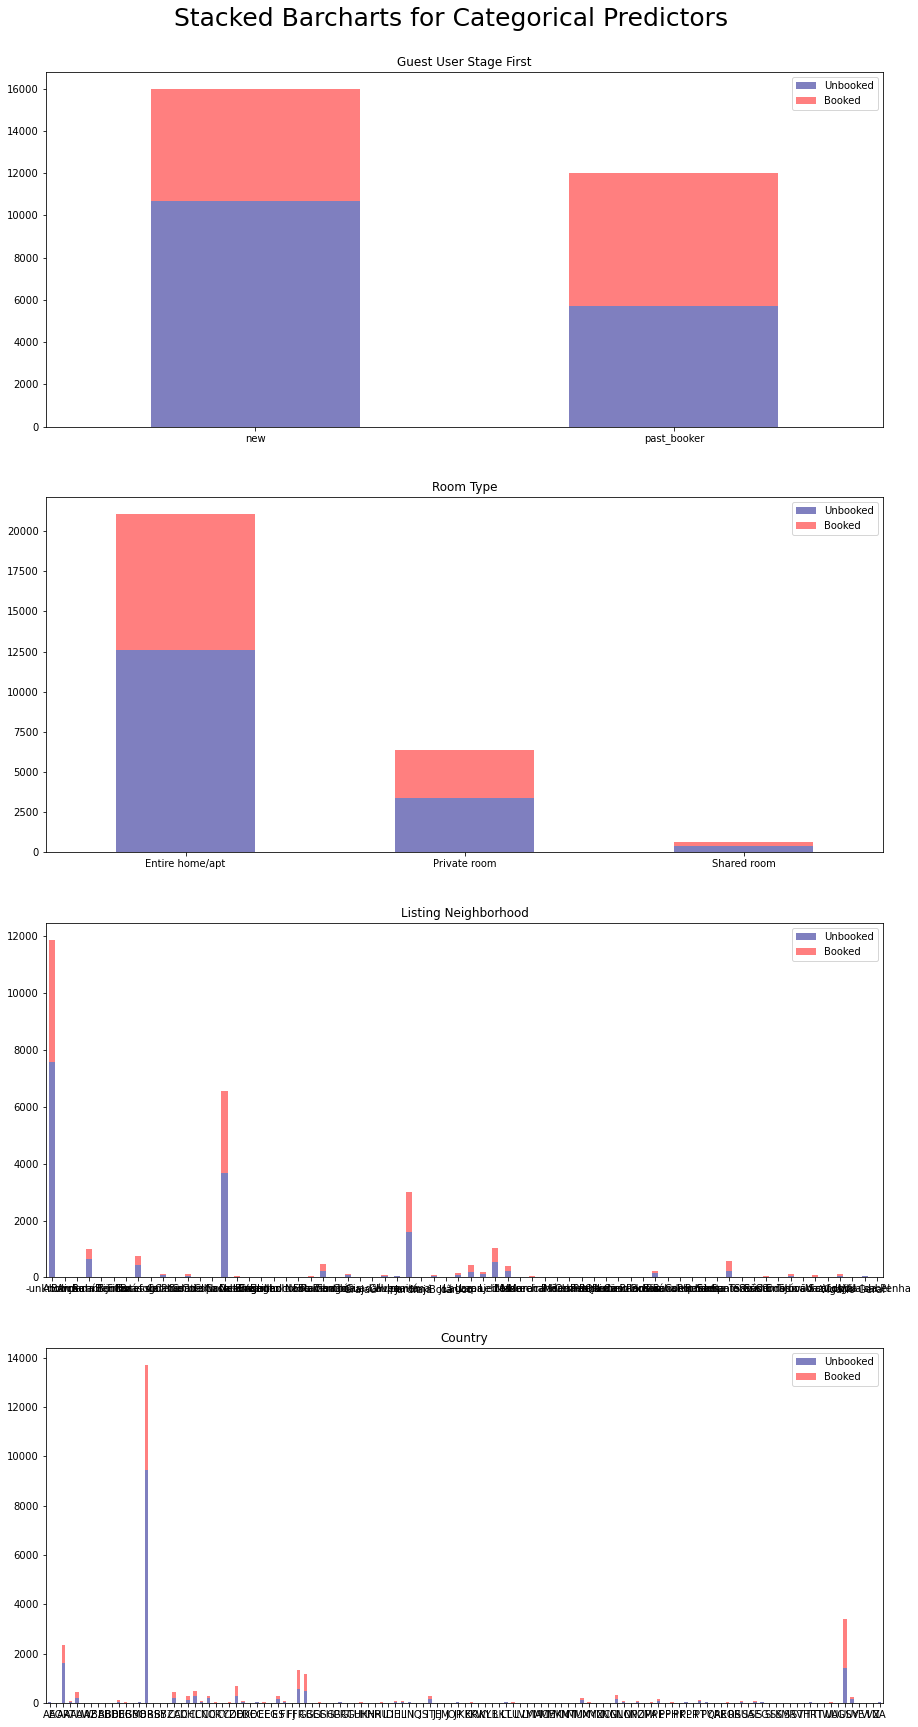

In [21]:

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

# date_format = mdates.DateFormatter('%B-%d')

for col, ax in zip(cat_cols[:4], axs.flatten()):
    group_data = cat_data.groupby([col,'booked']).size().unstack()
    group_data.columns = ['Unbooked', 'Booked']
    group_data.plot.bar(stacked=True, ax=ax, color=['#000080', '#FF0000'], alpha = 0.5)
    if col == 'signup_date':
        ax.xaxis.set_major_formatter(date_format)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
    else:
        ax.tick_params(labelrotation=0)
    ax.set_xlabel("")
    ax.set_title(col.replace('_', ' ').title())
    _ = ax.legend(loc='best')

plt.suptitle("Stacked Barcharts for Categorical Predictors",y=0.91, fontsize=25) 

In [25]:
combined_df3.id_guest_anon.nunique()

22566

In [27]:
combined_df3.id_guest_anon.value_counts()

25940fca-7aa9-480d-9cf0-56cc1136d30c    40
9ba5e5af-9de6-4584-9052-aa8d5709bd46    16
a3034105-9da6-48ed-8005-c1281f3a8674    15
60f27c23-f61e-4508-a53f-fd64d4b178fb    14
a78e2df5-6171-42a6-a7c4-71bac7387a14    12
                                        ..
5b10205e-61c3-468a-b628-ca0e346de5db     1
7ec5c5d5-fe94-4e10-ae73-864f2f649b7b     1
89c32f52-9461-47d6-b1b8-7b2e2f3ddd57     1
842c1524-ab65-4151-a7cd-6b07a6d5502b     1
e4df2980-f17f-4401-ae6f-914c667d0834     1
Name: id_guest_anon, Length: 22566, dtype: int64

In [28]:
combined_df3.shape

(27979, 23)

(0.0, 10.0)

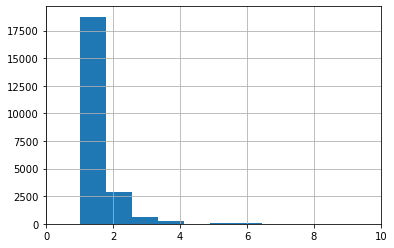

In [30]:
combined_df3.id_guest_anon.value_counts().hist(bins = 50)
plt.xlim(0, 10)

In [37]:
combined_df3.country.value_counts()

BR    13702
US     3416
AR     2326
FR     1333
GB     1163
      ...  
VI        1
GH        1
MZ        1
GE        1
AZ        1
Name: country, Length: 121, dtype: int64

<AxesSubplot:>

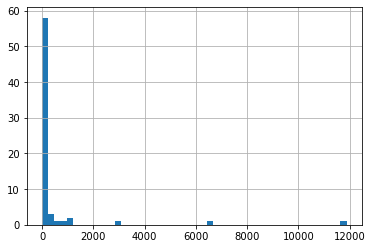

In [38]:
combined_df3.listing_neighborhood.value_counts().hist(bins = 50)

In [35]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27979 non-null  object        
 1   id_host_anon                          27979 non-null  object        
 2   id_listing_anon                       27979 non-null  object        
 3   ts_interaction_first                  27979 non-null  datetime64[ns]
 4   ts_reply_at_first                     25935 non-null  object        
 5   ts_accepted_at_first                  16454 non-null  object        
 6   ts_booking_at                         27979 non-null  int64         
 7   ds_checkin_first                      27979 non-null  datetime64[ns]
 8   ds_checkout_first                     27979 non-null  object        
 9   m_guests                              27979 non-null  float64       
 10

In [43]:
combined_df3.id_host_anon.value_counts().plot(kind='bar')

<AxesSubplot:>

Error in callback <function flush_figures at 0x117cfbcb0> (for post_execute):


KeyboardInterrupt: 